# Kalkulasi Nilai Akhir Menggunakan Data Frame

# Linear Regression 

## Simple Linear Regression

## Multiple Linear Regression

### Asumption

#### Variabel dependen merupakan variabel kontinu

##### Adanya hubungan linear (linearitas) antara variabel dependen (Y) dengan variabel independen (X)

In [96]:
# linearity test
from scipy.stats import pearsonr
def linearity_test(df, x, y):
    for i in x:
        print(f'Korelasi antara {i} dan {y[0]}')
        print(pearsonr(df[i], df[y[0]]))
        if pearsonr(df[i], df[y[0]])[1] > 0.05:
            print('Data tidak linear')
        else:
            print('Data linear')
        print('')


### Try to Data

#### Import Data

In [1]:
import pandas as pd
import numpy as np

In [189]:
# Read the data
df = pd.read_excel('Dataset Pertemuan 2.xlsx', sheet_name='Abalone')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,Male,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Akan bla bla ....

#### Looking The data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             200 non-null    object 
 1   Length          200 non-null    float64
 2   Diameter        200 non-null    float64
 3   Height          200 non-null    float64
 4   Whole weight    200 non-null    float64
 5   Shucked weight  200 non-null    float64
 6   Viscera weight  200 non-null    float64
 7   Shell weight    200 non-null    float64
 8   Rings           200 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 14.2+ KB


In [81]:
def info_data(df):
    print(f'Jumlah baris: {df.shape[0]}')
    print(f'Jumlah kolom: {df.shape[1]}')
    print(f'Data duplikat: {df.duplicated().sum()}')
    print(f'Jumlah data yang hilang: {df.isnull().sum().sum()}')

In [82]:
info_data(df)

Jumlah baris: 200
Jumlah kolom: 9
Data duplikat: 0
Jumlah data yang hilang: 0


#### Asumption Checking

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Adanya hubungan linear (linearitas) antara variabel dependen (Y) dengan variabel independen (X)

In [ ]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'premium'], dtype='object')

In [97]:
y = ['Whole weight']
x = ['Length', 'Diameter', 'Height', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
linearity_test(df, x, y)

Korelasi antara Length dan Whole weight
PearsonRResult(statistic=0.9201662616304329, pvalue=1.4315461455629623e-82)
Data linear

Korelasi antara Diameter dan Whole weight
PearsonRResult(statistic=0.9211653381773967, pvalue=4.3276087643654425e-83)
Data linear

Korelasi antara Height dan Whole weight
PearsonRResult(statistic=0.8975683031754451, pvalue=2.3660063815970936e-72)
Data linear

Korelasi antara Shucked weight dan Whole weight
PearsonRResult(statistic=0.9755961113777163, pvalue=2.490242396372261e-132)
Data linear

Korelasi antara Viscera weight dan Whole weight
PearsonRResult(statistic=0.9421519072948933, pvalue=6.09979933184026e-96)
Data linear

Korelasi antara Shell weight dan Whole weight
PearsonRResult(statistic=0.9582155746164518, pvalue=1.3996553710848957e-109)
Data linear

Korelasi antara Rings dan Whole weight
PearsonRResult(statistic=0.7655883814905788, pvalue=8.660333106910581e-40)
Data linear



<Figure size 2000x1500 with 0 Axes>

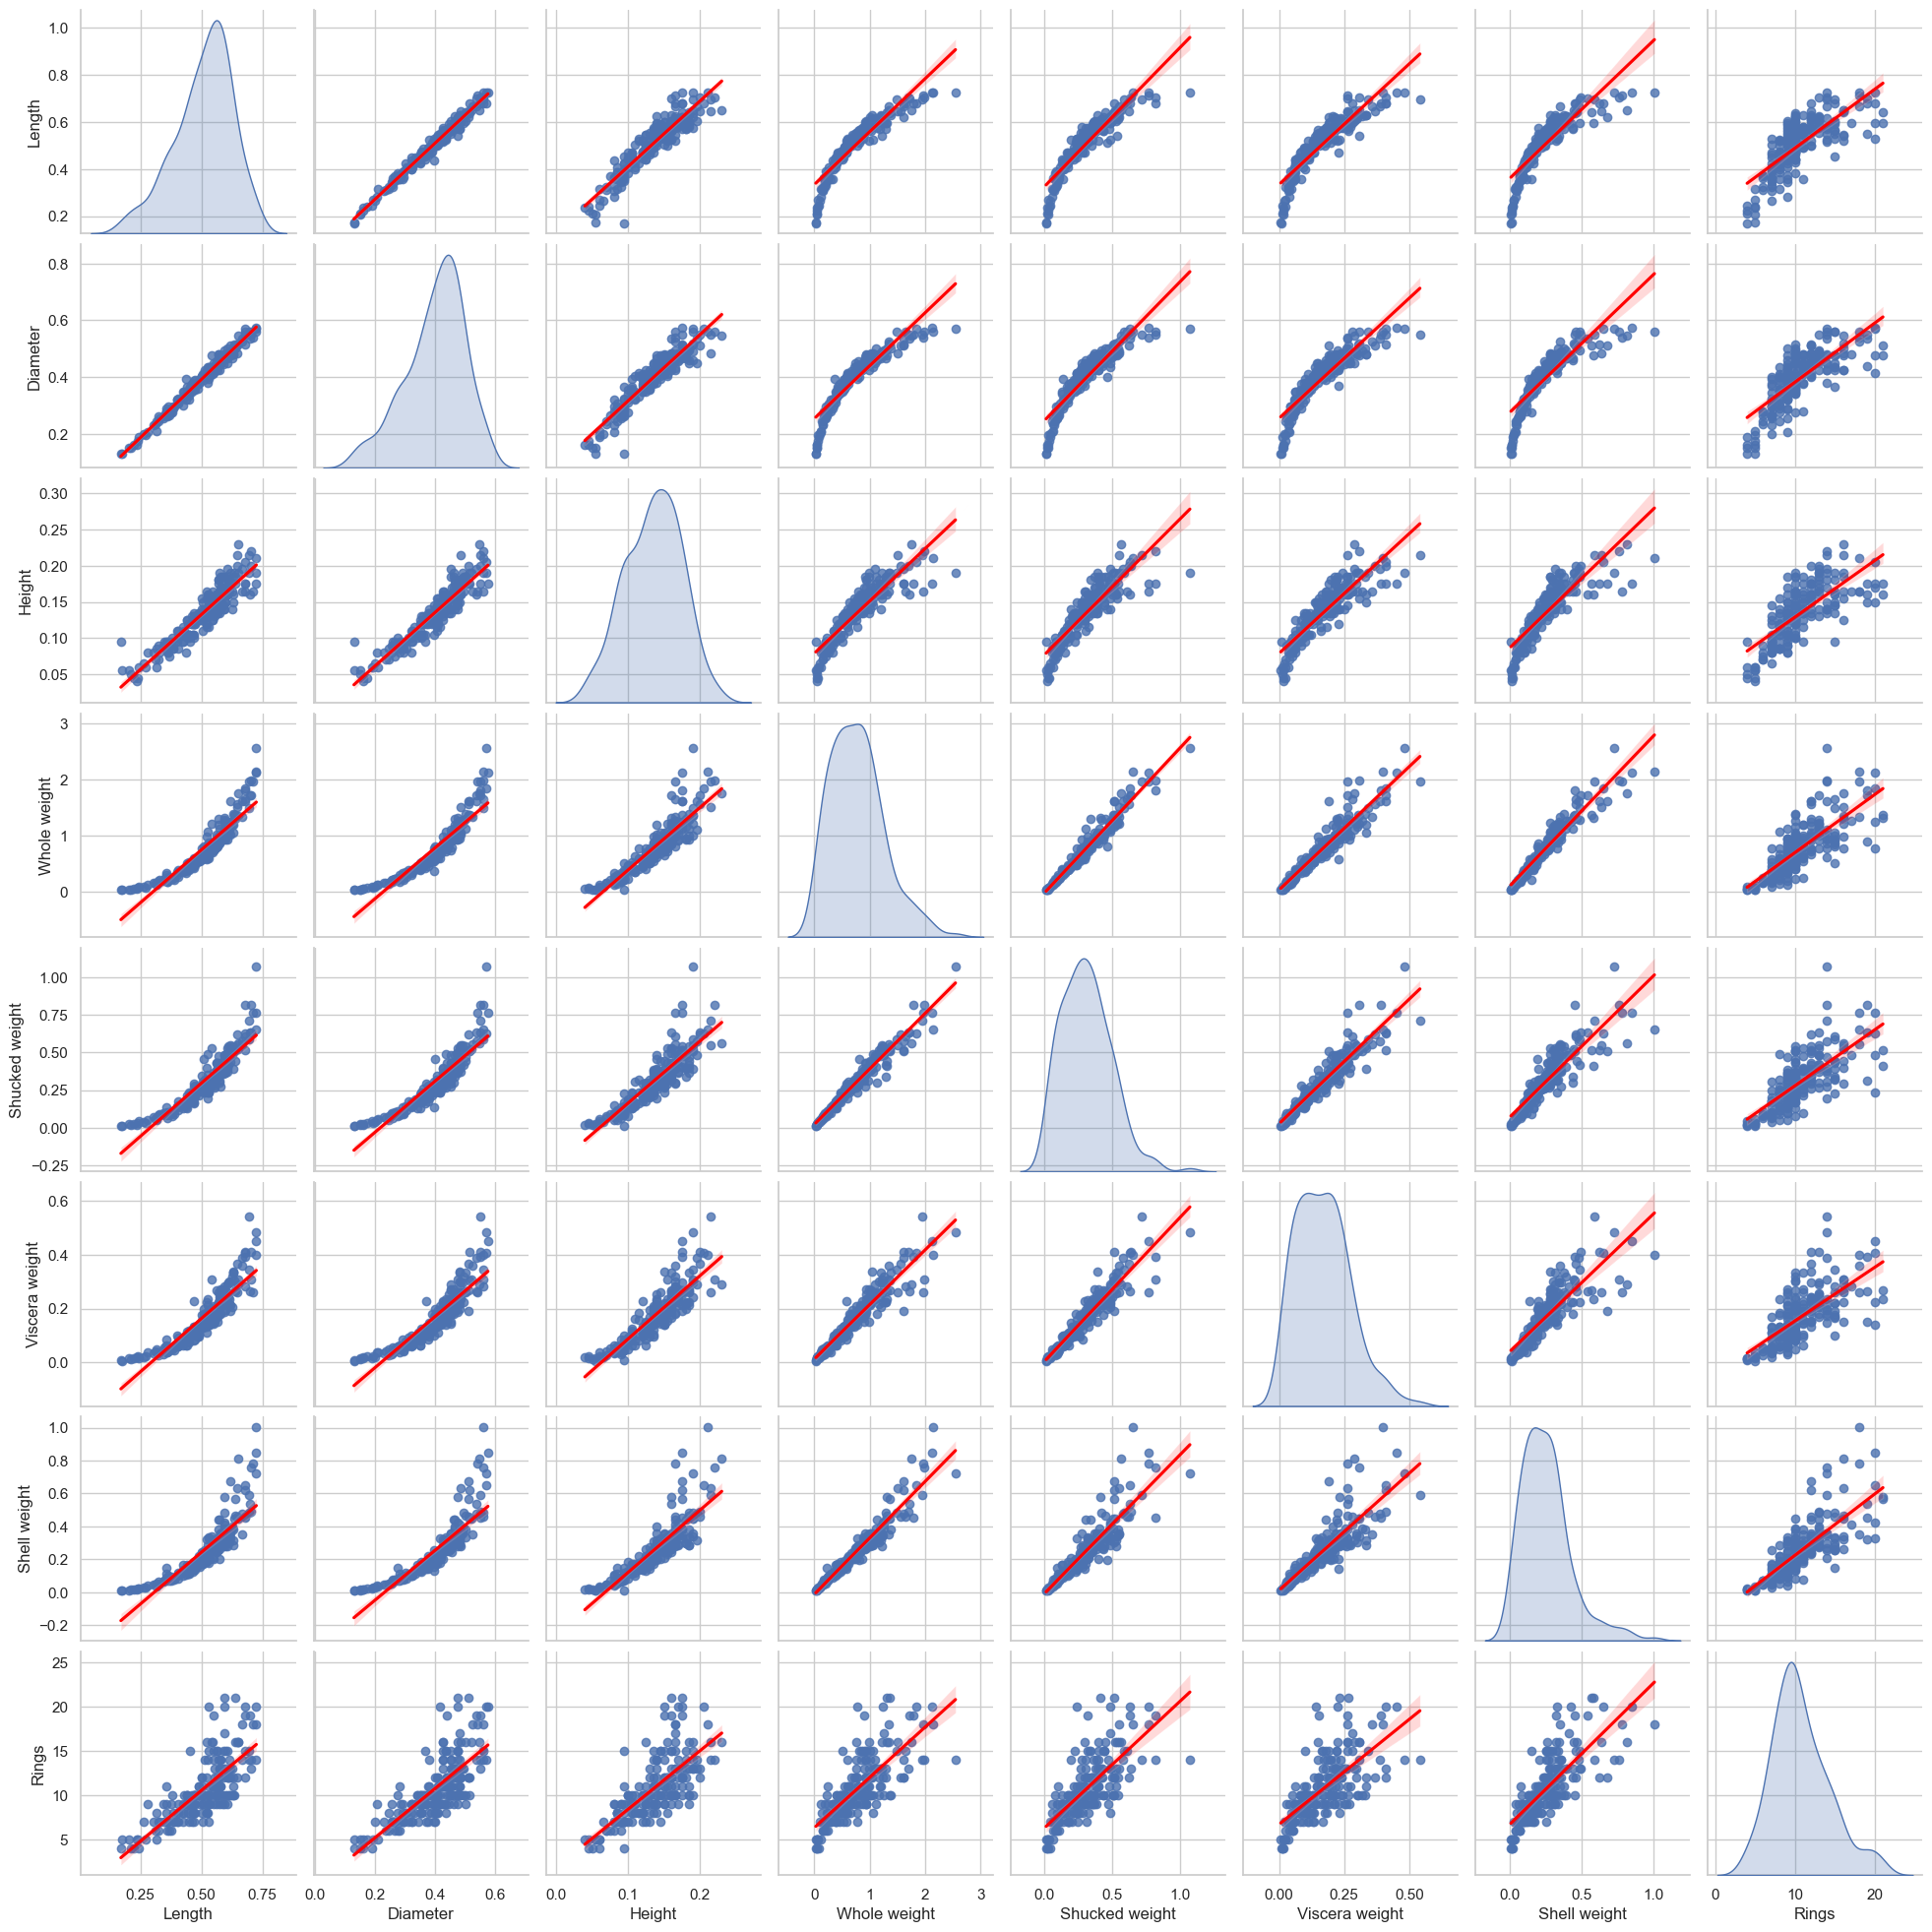

In [106]:
# make scatter plot for each x and y
plt.figure(figsize=(20, 15))

sns.pairplot(df,  kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}}) 

#### Regression using OLS

In [190]:
# Label Encoder df['Sex']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [192]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula for linear regression
x = ['Sex','Length', 'Diameter', 'Height', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
Y = df['Whole weight']
X = df[x]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3489.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          1.44e-202
Time:                        13:33:56   Log-Likelihood:                 361.44
No. Observations:                 200   AIC:                            -704.9
Df Residuals:                     191   BIC:                            -675.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0317      0.023     -1.

In [194]:
# Define the formula for linear regression
x = ['Sex','Length', 'Diameter', 'Height', 'Shucked weight', 'Viscera weight', 'Shell weight']
Y = df['Whole weight']
X = df[x]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4008.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          2.25e-204
Time:                        13:34:20   Log-Likelihood:                 361.41
No. Observations:                 200   AIC:                            -706.8
Df Residuals:                     192   BIC:                            -680.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0311      0.022     -1.

In [195]:
# Define the formula for linear regression
x = [ 'Sex', 'Diameter', 'Height', 'Shucked weight', 'Viscera weight', 'Shell weight']
Y = df['Whole weight']
X = df[x]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4690.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          3.86e-206
Time:                        13:34:39   Log-Likelihood:                 361.20
No. Observations:                 200   AIC:                            -708.4
Df Residuals:                     193   BIC:                            -685.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0368      0.021     -1.

In [196]:
# Define the formula for linear regression
x = [ 'Sex', 'Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight']
Y = df['Whole weight']
X = df[x]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5626.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          8.26e-208
Time:                        13:35:17   Log-Likelihood:                 360.66
No. Observations:                 200   AIC:                            -709.3
Df Residuals:                     194   BIC:                            -689.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0393      0.020     -1.

In [197]:
# Define the formula for linear regression
x = [ 'Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight']
Y = df['Whole weight']
X = df[x]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7025.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          1.68e-209
Time:                        13:35:37   Log-Likelihood:                 360.04
No. Observations:                 200   AIC:                            -710.1
Df Residuals:                     195   BIC:                            -693.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0439      0.020     -2.

In [198]:
# Define the formula for linear regression
x = ['Shucked weight', 'Viscera weight', 'Shell weight']
Y = df['Whole weight']
X = df[x]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     9291.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          5.80e-211
Time:                        13:36:03   Log-Likelihood:                 358.72
No. Observations:                 200   AIC:                            -709.4
Df Residuals:                     196   BIC:                            -696.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0131      0.006     -2.

In [199]:
df['Result'] = result.fittedvalues
df['Residual'] = result.resid

#### Diagnostic Checking

##### Error Normal

In [200]:
from scipy.stats import shapiro
from scipy.stats import kstest

def normality_test(df, coloumn_name):
    if len(df[coloumn_name]) < 50:
        result = shapiro(df[coloumn_name])
        print('Shapiro Test')
        
    else:
        result = kstest(df[coloumn_name], 'norm')
        print('Kolmogorov-Smirnov Test')
    print(f'Statistic: {result.statistic}', f'p-value: {result.pvalue}')
    if result.pvalue > 0.05:
        print('Data normal')
    else:
        print('Data tidak normal')
    print('')
        

In [201]:
normality_test(df, 'Residual')

Kolmogorov-Smirnov Test
Statistic: 0.456943511539224 p-value: 1.0729169724244772e-38
Data tidak normal



c:\Users\Levono\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Residual', ylabel='Density'>

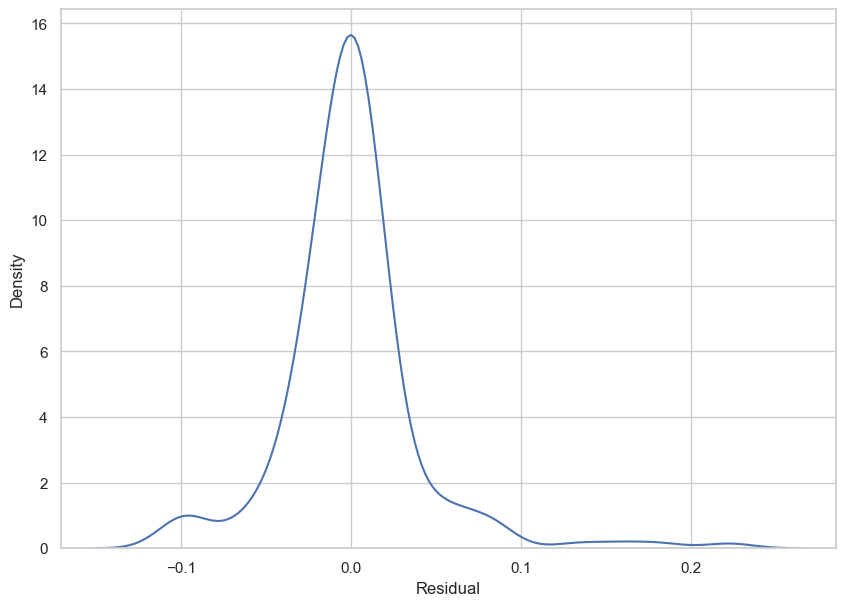

In [202]:
# plot df['Residual]
plt.figure(figsize=(10, 7)) 
sns.distplot(df['Residual'], hist=False)

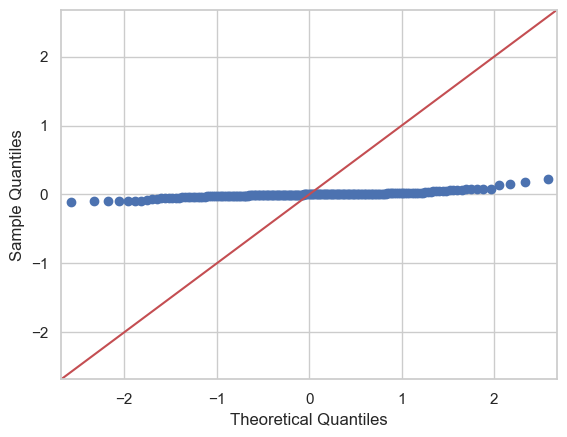

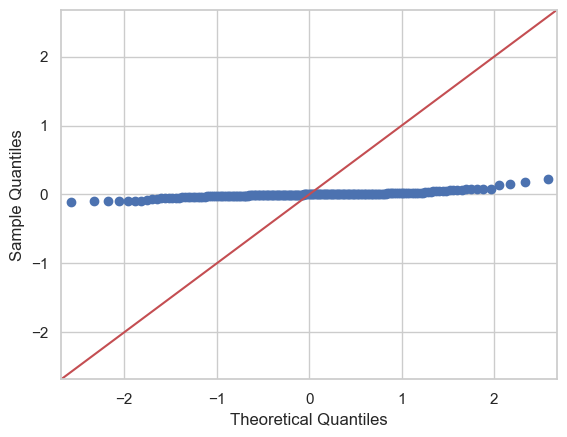

In [209]:
sm.qqplot(df['Residual'], line ='45')

##### Homoskedastisitas

<AxesSubplot:xlabel='ZPRED', ylabel='ZRESID'>

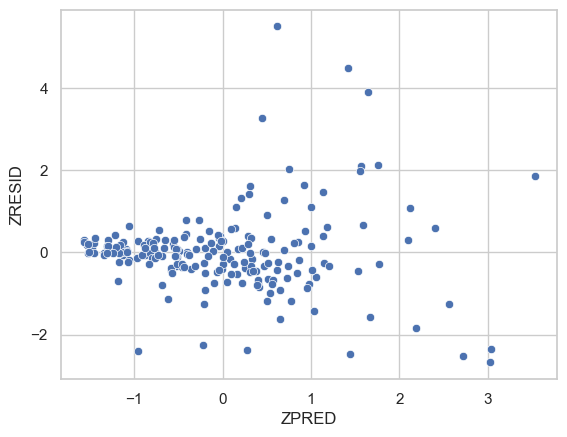

In [203]:
# Homoscedasticity test
df['ZRESID'] = (df['Residual'] - df['Residual'].mean()) / df['Residual'].std()
df['ZPRED'] = (df['Result'] - df['Result'].mean()) / df['Result'].std()
sns.scatterplot(x='ZPRED', y='ZRESID', data=df)


##### Autokorelasi

In [205]:
# autocorrelation test
from statsmodels.stats.stattools import durbin_watson

def autocorrelation_test(df, coloumn_name):
    result = durbin_watson(df[coloumn_name])
    print(f'Durbin-Watson: {result}')
    if result > 1.5 and result < 2.5:
        print('Data tidak memiliki autokorelasi')
    else:
        print('Data memiliki autokorelasi')

        
    print('')

In [207]:
autocorrelation_test(df, 'Residual')

Durbin-Watson: 2.1427197652272953
Data tidak memiliki autokorelasi



##### MSE

In [171]:
df['SE'] = df['Residual']**2
mse = df['SE'].mean()
mse

0.0016203699750230436

<AxesSubplot:xlabel='Whole weight', ylabel='Result'>

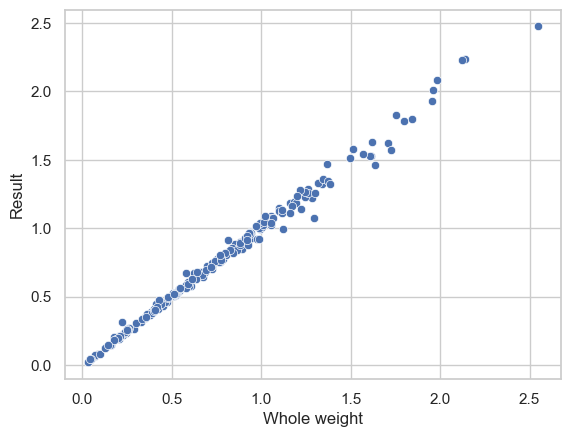

In [208]:
sns.scatterplot(y='Result', x='Whole weight', data=df)

# Linier Regression Machine Learning

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
df.corr().sort_values('Whole weight', ascending=False)['Whole weight']

Whole weight      1.000000
Result            0.996502
Shucked weight    0.975596
Shell weight      0.958216
Viscera weight    0.942152
Diameter          0.921165
Length            0.920166
Height            0.897568
Rings             0.765588
SE                0.379256
Residual          0.083563
Name: Whole weight, dtype: float64

In [178]:
ml = LinearRegression()
x = df[['Shucked weight', 'Viscera weight', 'Shell weight']]
y = df['Whole weight']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ml_model = ml.fit(x_train, y_train)
y_pred = ml_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [179]:
mse

0.0013144747872732637

# More Interactive Function

In [215]:
import geomeow as meow

In [216]:
dir(meow)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'atriangle_area',
 'circle_area',
 'circle_perimeter',
 'inradius',
 'math',
 'outradius',
 'parallelogram_area',
 'squares_area',
 'striangle_area',
 'tcircle_grad',
 'tcircle_point',
 'trapezoid_area',
 'triangle_area']

In [219]:
meow.inradius(3,4,5)

Inradius of the triangle: 1.0


1.0

In [218]:
meow.circle_perimeter(r=-7)

ValueError: Radius must be positive

In [ ]:
meow.tcircle_point(0, 0, 7, 5, 7)

The equation of the tangent line to the circle with center = (0, 0) and radius = 7 that passes through the external point (5, 7) is y = -0.7142857142857143x + 7.0


'y = -0.7142857142857143x + 7.0'